In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load your dataset

data = pd.read_csv("E:/project/2-2/data_r.csv")

In [3]:
data.shape

(2548, 4)

In [4]:
data.columns

Index(['SMILES', 'Tanimoto', 'Dice', 'russel_rao'], dtype='object')

In [5]:
# Extract numeric attributes for clustering
numeric_attributes = data[['Tanimoto']]

In [6]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_attributes)

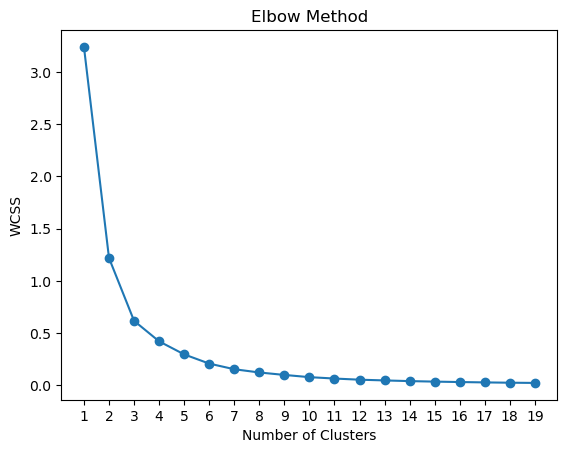

In [11]:
wcss = []

for i in range(1, 20):
    km = KMeans(n_clusters=i, n_init=10)  # Explicitly set n_init parameter
    km.fit(numeric_attributes)
    wcss.append(km.inertia_)

# Plot the WCSS values
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 20))
plt.show()


In [7]:
data.columns

Index(['SMILES', 'Tanimoto', 'Dice', 'russel_rao'], dtype='object')

                                              SMILES  Tanimoto  Cluster_T
0     CCC[S@](=O)c1ccc2c(c1)[nH]/c(=N/C(=O)OC)/[nH]2  0.081081          9
1      CCC(=O)O[C@]1(CC[NH+](C[C@@H]1CC=C)C)c2ccccc2  0.084967          9
2               C[C@@H](c1ccc(cc1)NCC(=C)C)C(=O)[O-]  0.086957          9
3         C[C@H](Cc1ccccc1)[NH2+][C@@H](C#N)c2ccccc2  0.117241          0
4     C[C@@H](CC(c1ccccc1)(c2ccccc2)C(=O)N)[NH+](C)C  0.150685          8
...                                              ...       ...        ...
2543                       Cc1ccc(cc1)CNC(=O)c2ccco2  0.108696          4
2544             C[C@@H]1CN(C[C@H](O1)C)C(=O)c2ccco2  0.071942          1
2545             C[C@H]1CN(C[C@@H](O1)C)C(=O)c2ccco2  0.071942          1
2546                  Cc1cccc(c1C)NC(=O)c2cccc(c2)OC  0.134752          3
2547                   CN(c1ccccc1)C(=O)c2cccc(c2)OC  0.136691          3

[2548 rows x 3 columns]


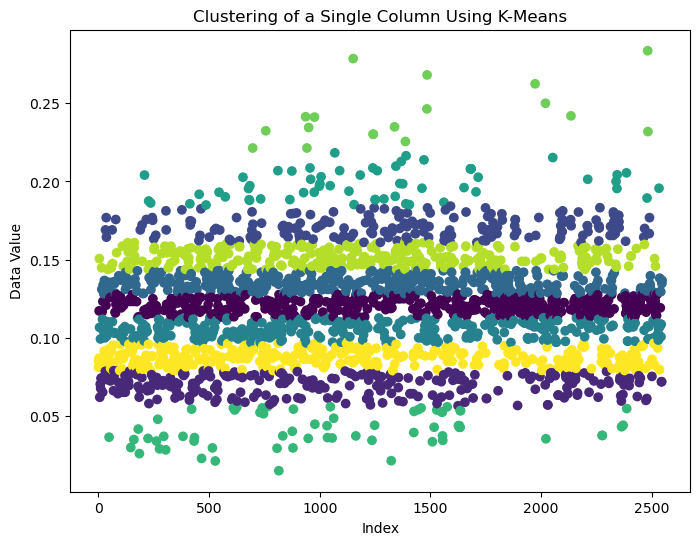

In [8]:


# Apply K-Means clustering
num_clusters = 10  # Set the number of clusters you want to create
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataset
data['Cluster_T'] = clusters

# Print or visualize the cluster assignments
print(data[['SMILES','Tanimoto' ,'Cluster_T']])

# Plot the clustering result using the first two principal components (for visualization)


x_values = data['Tanimoto'].index


plt.figure(figsize=(8, 6))
plt.scatter(x_values, data['Tanimoto'], c=clusters, cmap='viridis', marker='o')
plt.title('Clustering of a Single Column Using K-Means')
plt.xlabel('Index')
plt.ylabel('Data Value')
plt.show()





In [9]:
from sklearn.metrics import silhouette_score
X = np.array(data['Tanimoto'])
x_values=X.reshape(-1, 1)
silhouette_avg = silhouette_score(x_values, clusters)
print(silhouette_avg)

0.5346984993013408


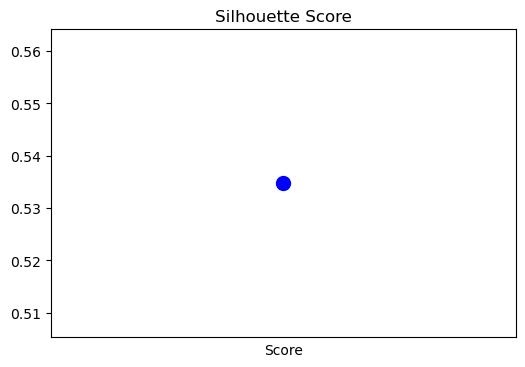

In [10]:
plt.figure(figsize=(6, 4))
plt.scatter([0], [silhouette_avg], color='blue', marker='o', s=100)
plt.xlim(-1, 1)  # Adjust x-axis limits to match the Silhouette Score range (-1 to 1)
plt.title('Silhouette Score')
plt.xlabel('Score')
plt.xticks([])  # Hide x-axis ticks
plt.show()

In [11]:
data.columns

Index(['SMILES', 'Tanimoto', 'Dice', 'russel_rao', 'Cluster_T'], dtype='object')

In [12]:
cluster_counts = data['Cluster_T'].value_counts()

In [13]:
cluster_counts

0    477
3    410
9    382
4    340
8    306
1    274
2    208
6     72
5     61
7     18
Name: Cluster_T, dtype: int64

In [14]:
for i in range(0,10):
    print(data[data['Cluster_T'] == i]['Tanimoto'].describe())

count    477.000000
mean       0.120867
std        0.004048
min        0.113208
25%        0.117647
50%        0.120805
75%        0.124138
max        0.127820
Name: Tanimoto, dtype: float64
count    274.000000
mean       0.070185
std        0.006160
min        0.056604
25%        0.064865
50%        0.071919
75%        0.075342
max        0.078947
Name: Tanimoto, dtype: float64
count    208.000000
mean       0.170872
std        0.006087
min        0.161074
25%        0.165505
50%        0.170370
75%        0.175325
max        0.184211
Name: Tanimoto, dtype: float64
count    410.000000
mean       0.135034
std        0.004452
min        0.128205
25%        0.131034
50%        0.135135
75%        0.138838
max        0.142857
Name: Tanimoto, dtype: float64
count    340.000000
mean       0.105453
std        0.004773
min        0.096774
25%        0.100719
50%        0.105797
75%        0.109489
max        0.112782
Name: Tanimoto, dtype: float64
count    61.000000
mean      0.198229
std    

In [15]:
data[data['Cluster_T'] == 7].to_csv("E:/project/2-2/KMEANS_8_CLUSTER_ENTIRES.csv")

In [29]:
data1 = pd.read_csv("E:/project/2-2/data_r.csv")

In [30]:
# Extract numeric attributes for clustering
numeric_attributes1 = data1[['russel_rao']]

In [31]:
scaler1 = StandardScaler()
scaled_data1 = scaler1.fit_transform(numeric_attributes1)

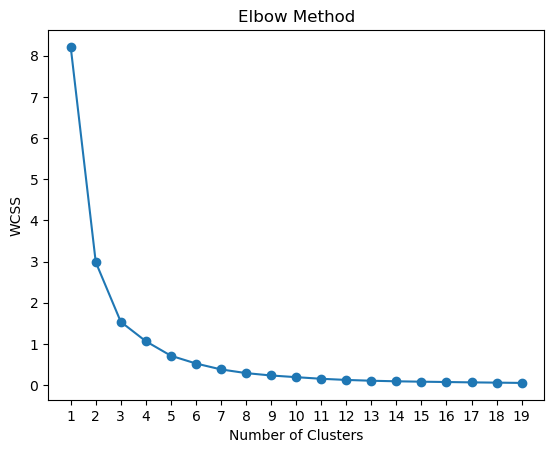

In [18]:
wcss = []

for i in range(1, 20):
    km = KMeans(n_clusters=i, n_init=10)  # Explicitly set n_init parameter
    km.fit(numeric_attributes1)
    wcss.append(km.inertia_)

# Plot the WCSS values
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 20))
plt.show()


                                              SMILES  russel_rao  Cluster_R
0     CCC[S@](=O)c1ccc2c(c1)[nH]/c(=N/C(=O)OC)/[nH]2    0.150000          1
1      CCC(=O)O[C@]1(CC[NH+](C[C@@H]1CC=C)C)c2ccccc2    0.156627          9
2               C[C@@H](c1ccc(cc1)NCC(=C)C)C(=O)[O-]    0.160000          9
3         C[C@H](Cc1ccccc1)[NH2+][C@@H](C#N)c2ccccc2    0.209877          0
4     C[C@@H](CC(c1ccccc1)(c2ccccc2)C(=O)N)[NH+](C)C    0.261905          3
...                                              ...         ...        ...
2543                       Cc1ccc(cc1)CNC(=O)c2ccco2    0.196078          5
2544             C[C@@H]1CN(C[C@H](O1)C)C(=O)c2ccco2    0.134228          1
2545             C[C@H]1CN(C[C@@H](O1)C)C(=O)c2ccco2    0.134228          1
2546                  Cc1cccc(c1C)NC(=O)c2cccc(c2)OC    0.237500          7
2547                   CN(c1ccccc1)C(=O)c2cccc(c2)OC    0.240506          7

[2548 rows x 3 columns]


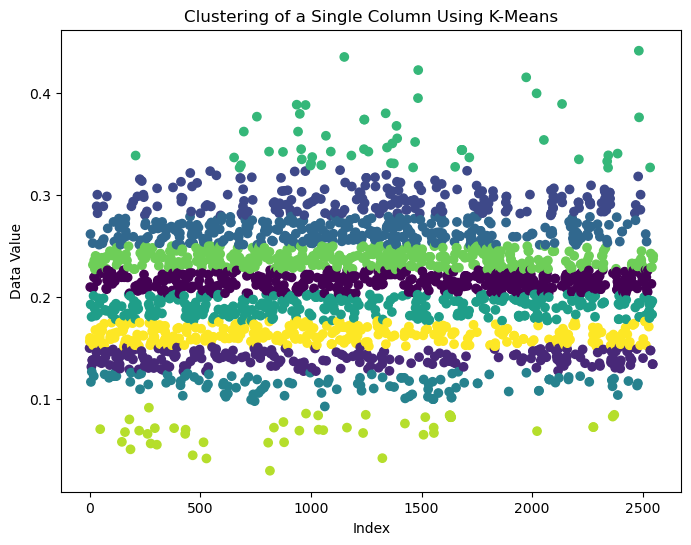

In [32]:


# Apply K-Means clustering
num_clusters1 = 10  # Set the number of clusters you want to create
kmeans1 = KMeans(n_clusters=num_clusters1, random_state=0)
clusters1 = kmeans1.fit_predict(scaled_data1)

# Add cluster labels to the original dataset
data1['Cluster_R'] = clusters1

# Print or visualize the cluster assignments
print(data1[['SMILES','russel_rao' ,'Cluster_R']])

# Plot the clustering result using the first two principal components (for visualization)


x_values = data1['russel_rao'].index


plt.figure(figsize=(8, 6))
plt.scatter(x_values, data1['russel_rao'], c=clusters1, cmap='viridis', marker='o')
plt.title('Clustering of a Single Column Using K-Means')
plt.xlabel('Index')
plt.ylabel('Data Value')
plt.show()





In [33]:
from sklearn.metrics import silhouette_score
X = np.array(data1['russel_rao'])
x_values=X.reshape(-1, 1)
silhouette_avg = silhouette_score(x_values, clusters1)
print(silhouette_avg)

0.5391019001333692


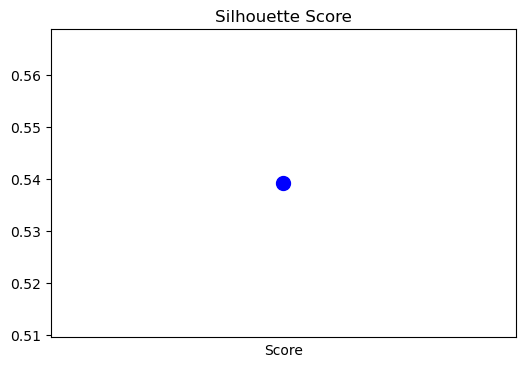

In [34]:
plt.figure(figsize=(6, 4))
plt.scatter([0], [silhouette_avg], color='blue', marker='o', s=100)
plt.xlim(-1, 1)  # Adjust x-axis limits to match the Silhouette Score range (-1 to 1)
plt.title('Silhouette Score')
plt.xlabel('Score')
plt.xticks([])  # Hide x-axis ticks
plt.show()

In [35]:
cluster_counts1 = data1['Cluster_R'].value_counts()

In [36]:
cluster_counts1

0    475
7    412
5    338
9    332
3    325
1    235
2    213
4    114
6     55
8     49
Name: Cluster_R, dtype: int64

In [37]:
for i in range(0,10):
    print(data1[data1['Cluster_R'] == i]['russel_rao'].describe())

count    475.000000
mean       0.215598
std        0.006420
min        0.203390
25%        0.210526
50%        0.215569
75%        0.220859
max        0.226415
Name: russel_rao, dtype: float64
count    235.000000
mean       0.140151
std        0.006360
min        0.127389
25%        0.135135
50%        0.140845
75%        0.145840
max        0.150943
Name: russel_rao, dtype: float64
count    213.000000
mean       0.295947
std        0.011034
min        0.280255
25%        0.287425
50%        0.294118
75%        0.303030
max        0.324675
Name: russel_rao, dtype: float64
count    325.000000
mean       0.263560
std        0.008090
min        0.251366
25%        0.256983
50%        0.262295
75%        0.270968
max        0.279330
Name: russel_rao, dtype: float64
count    114.000000
mean       0.114516
std        0.007933
min        0.092715
25%        0.109030
50%        0.115942
75%        0.120805
max        0.126761
Name: russel_rao, dtype: float64
count    338.000000
mean       0.19

In [38]:
data1[data1['Cluster_R'] == 6].to_csv("E:/project/2-2/KMEANS_7_CLUSTER_ENTIRES_russel.csv")